In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments\src')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

from IPython.display import display, Markdown, Latex
from collections import *
from statistics import mean
from functools import *
from os import linesep as EOL
from itertools import *
import re
import json
import pathlib
import glob
import math

import spacy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import plotly as py

from models.cascades import *
from viz.cascades import *
from utils.misc import progress

py.offline.init_notebook_mode()
np.random.seed(0)

Changed cwd: C:\Users\kevin\Documents\Workspace\psylit-experiments\src


In [22]:
{k for k in globals().keys() if not k.startswith('_')}

{'AsyncGenerator',
 'AsyncIterable',
 'AsyncIterator',
 'Awaitable',
 'BLOCK_ENT',
 'ByteString',
 'CASC_ROOT',
 'Callable',
 'Cascades',
 'ChainMap',
 'Collection',
 'Container',
 'Coroutine',
 'Counter',
 'DATA_ROOT',
 'DaskMultiCascades',
 'ENT_LEVEL',
 'ENT_RATE',
 'EOL',
 'EXCESS_ENT',
 'Experiment',
 'FEATURE_TRANSFORMERS',
 'FEAT_LEVEL',
 'Generator',
 'Hashable',
 'In',
 'ItemsView',
 'Iterable',
 'Iterator',
 'KeysView',
 'Latex',
 'Mapping',
 'MappingView',
 'Markdown',
 'MultiCascades',
 'MutableMapping',
 'MutableSequence',
 'MutableSet',
 'OrderedDict',
 'Out',
 'ROLE_LEVEL',
 'ROOT',
 'Reversible',
 'Sequence',
 'Set',
 'Sized',
 'UserDict',
 'UserList',
 'UserString',
 'ValuesView',
 'WRAPPER_ASSIGNMENTS',
 'WRAPPER_UPDATES',
 'accumulate',
 'casc_files',
 'chain',
 'cmp_to_key',
 'combinations',
 'combinations_with_replacement',
 'compress',
 'count',
 'cycle',
 'dd',
 'defaultdict',
 'deque',
 'df',
 'display',
 'docs',
 'dropwhile',
 'exit',
 'features_transform',
 'f

In [2]:
plt.rcParams['figure.figsize'] = 16,10

In [3]:
from experiments.block_entropy import BlockEntropy_StimulusResponse as Experiment
ROOT = pathlib.Path().resolve()
DATA_ROOT = ROOT.parent  / 'data' / 'analytics'
print(ROOT)
print(DATA_ROOT)

Experiment.clear_missing_results(DATA_ROOT)

C:\Users\kevin\Documents\Workspace\psylit-experiments\src
C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics


In [4]:
BLOCK_ENT = '$H(k)$'
EXCESS_ENT = '$\eta^{(k)}$'
ENT_RATE = '$h^{(k)}$'

In [5]:
results = Experiment.load_all_results(DATA_ROOT, run_col_name='Document')
results = results['persubj']
results.pop('Unnamed: 0')
results.head()

,,$H(k)$,Category,Feature,Subject,be,k,n
,Document,,,,,,,
0,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,0.207817,1,6603.0
1,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,0.932323,5,6599.0
2,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,1.761592,10,6594.0
3,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,2.516922,15,6589.0
4,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,3.230813,20,6584.0


In [6]:
from experiments.block_entropy import BlockEntropy_StimulusResponse as Experiment
ROOT = pathlib.Path().resolve()
DATA_ROOT = ROOT.parent  / 'data' / 'analytics'
print(ROOT)
print(DATA_ROOT)

Experiment.clear_missing_results(DATA_ROOT)
results = Experiment.load_all_results(DATA_ROOT, run_col_name='Document')
results = results['persubj']
#results = results.assign(Subject=np.random.choice(['Foo','Bar'], size=(len(results.index),))).set_index('Subject', append=True)
results.head()

C:\Users\kevin\Documents\Workspace\psylit-experiments\src
C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics


,,$H(k)$,Category,Feature,Subject,Unnamed: 0,be,k,n
,Document,,,,,,,,
0,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,0,0.207817,1,6603.0
1,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,1,0.932323,5,6599.0
2,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,2,1.761592,10,6594.0
3,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,3,2.516922,15,6589.0
4,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel",NaN,Other,Unknown,NARRATOR,4,3.230813,20,6584.0


In [11]:
from models.cascades import MultiCascades, FEATURE_TRANSFORMERS
from utils.io import file_parts
from utils.misc import progress

CASC_ROOT = ROOT.parent / 'data' / 'processed' / 'train'
casc_files = list(CASC_ROOT.glob('**/*.csv*'))
print(len(casc_files), 'cascade files')
docs = set(results.index.get_level_values('Document').unique())
print(len(docs), 'docs')
casc_files = [p for p in casc_files if file_parts(p)[0] in docs]
mc = MultiCascades.from_csvs(casc_files, document_col='Document')

150 cascade files
150 docs
1 / 150 [estimated time remaining: 00:00:00]
2 / 150 [estimated time remaining: 00:00:11]
3 / 150 [estimated time remaining: 00:00:24]
4 / 150 [estimated time remaining: 00:01:20]
5 / 150 [estimated time remaining: 00:03:17]
6 / 150 [estimated time remaining: 00:02:39]
7 / 150 [estimated time remaining: 00:02:14]
8 / 150 [estimated time remaining: 00:01:59]
9 / 150 [estimated time remaining: 00:01:50]
10 / 150 [estimated time remaining: 00:02:02]
11 / 150 [estimated time remaining: 00:01:51]
12 / 150 [estimated time remaining: 00:01:52]
13 / 150 [estimated time remaining: 00:01:46]
14 / 150 [estimated time remaining: 00:02:22]
15 / 150 [estimated time remaining: 00:02:13]
16 / 150 [estimated time remaining: 00:02:08]
17 / 150 [estimated time remaining: 00:02:02]
18 / 150 [estimated time remaining: 00:01:55]
19 / 150 [estimated time remaining: 00:01:54]
20 / 150 [estimated time remaining: 00:01:48]
21 / 150 [estimated time remaining: 00:01:52]
22 / 150 [estima

In [12]:
mc

neg  \
Subject        t     Document                                             
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel    0   
...                                                                 ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel        0   

                                                                    L_valence  \
Subject        t     Document                                                   
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel          1   
...                                                                       ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel              1   

                                                                    L_negative  \
Subject        t     Document                                                    
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           1   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel           0   
...                                                                        ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel               1   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   
               30452 EN_1930_Mansfield,Katherine_TheAloe_Novel               0   

                                                                    L_fear  \
Subject        t     Document                                                
NARRATOR       2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               6     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               39    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               45    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
               58    EN_1771_Mackenzie,Henry_TheManofFeeling_Novel       0   
...                                                                    ...   
mrs. fairfield 30423 EN_1930_Mansfield,Katherine_TheAloe_Novel           1   
               30427 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30434 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30441 EN_1930_Mansfield,Katherine_TheAloe_Novel           0   
               30452 EN_1930_Mansfi

In [25]:
from models.cascades import FEATURE_TRANSFORMERS
transform_function = FEATURE_TRANSFORMERS['StimulusResponse']
mcsr = transform_function(mc, use_dask=True)
mcsr

pairing...


KeyboardInterrupt: 

In [25]:
from models.cascades import DaskMultiCascades, FEATURE_TRANSFORMERS
from utils.io import file_parts

CASC_ROOT = ROOT.parent / 'data' / 'processed' / 'train'
casc_files = list(CASC_ROOT.glob('**/*.csv*'))
print(len(casc_files), 'cascade files')
docs = set(results.index.get_level_values('Document').unique())
print(len(docs), 'docs')
casc_files = [p for p in casc_files if file_parts(p)[0] in docs]
dmc = DaskMultiCascades.from_csvs(casc_files, document_col='Document')
dmc

150 cascade files
150 docs


In [ ]:
ns = pd.Series(mcsr.casc.groupby(level=['Document', 'Subject']).size(), name='n')
ns

In [ ]:
mcsr

In [ ]:
display(Markdown("""## Average frequency per sample"""))
print(f"{len(mcsr.subjects)} subjects")
print(f"{mcsr.n_rows} data points ({mcsr.n_rows / len(mcsr.subjects)} / subject)")

freq = mcsr.casc.groupby(level=['Document', 'Subject']).sum()
freq.mean()

In [21]:
df = results.droplevel(0).set_index(['Subject'], append=True)
df = df.merge(ns, how='left', on=['Document', 'Subject'])
df[ENT_RATE] = df[BLOCK_ENT] / df.k
df[EXCESS_ENT] = df[BLOCK_ENT] - df.k * df[ENT_RATE]
#df['n'] = df.groupby(level=[0,1]).size().reset_index()
m = 2
alp_len = 2**m
log_alp_len = math.log(alp_len, 2)
left=df.n * df[BLOCK_ENT]
right=df.k * alp_len ** df.k * log_alp_len

df = df.assign(
    reliability=left.ge(right).replace({True: 'Reliable', False: 'Unreliable'}).astype('category'),
)
reliable = df.reliability == 'Reliable'
df.head()

NameError: name 'ns' is not defined

In [ ]:
#fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sns.lineplot(data=df, x='k', y=BLOCK_ENT, hue='Category')
plt.title('Block entropy [bits] vs history length')
plt.show()

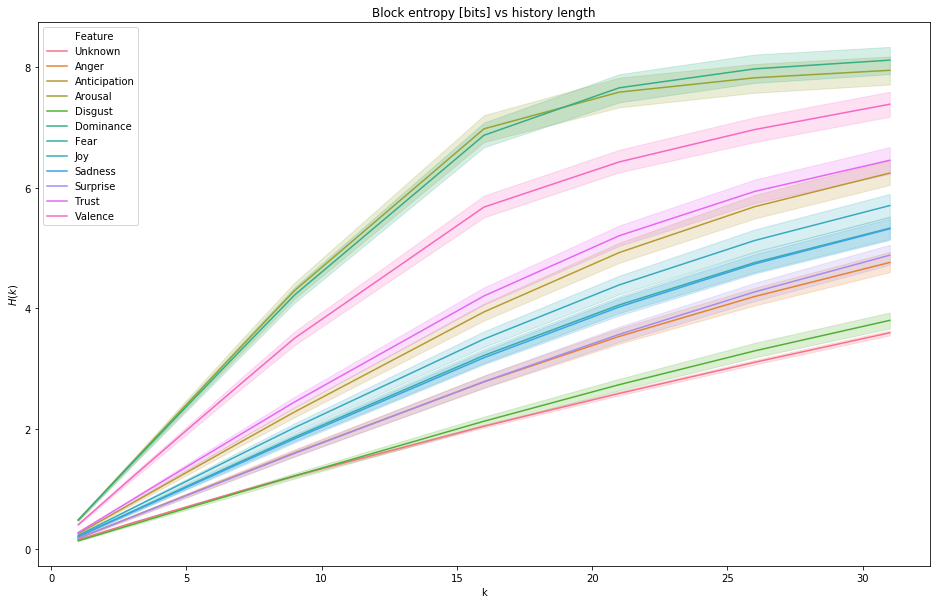

In [39]:
sns.lineplot(data=df, x='k', y=BLOCK_ENT, hue='Feature')
plt.title('Block entropy [bits] vs history length')
plt.show()

In [51]:
dflim = df[df.k == df.k.max()].sort_values(by=ENT_RATE, ascending=False)
dflim

$H(k)$  \
Document                                           Subject                     
EN_1796_Burney,Fanny_Camilla_Novel                 mrs. berlinton  15.978595   
                                                   friend          15.978595   
                                                   edgar           15.978595   
                                                   my dear         15.978595   
                                                   miss margland   15.978595   
...                                                                      ...   
EN_1884_Twain,Mark_TheAdventuresofHuckleberryFi... doctor           0.000000   
EN_1927_Woolf,Virginia_TotheLighthouse_Novel       READER           0.000000   
EN_1862_Eliot,George_Romola_Novel                  monna lisa       0.000000   
EN_1911_Wharton,Edith_EthanFrome_Novel             READER           0.000000   
EN_1913_Lawrence,DH_SonsandLovers_Novel            baxter           0.000000   

                                                                   Category  \
Document                                           Subject                    
EN_1796_Burney,Fanny_Camilla_Novel                 mrs. berlinton  Stimulus   
                                                   friend          Stimulus   
                                                   edgar           Stimulus   
                                                   my dear         Stimulus   
                                                   miss margland   Stimulus   
...                                                                     ...   
EN_1884_Twain,Mark_TheAdventuresofHuckleberryFi... doctor          Response   
EN_1927_Woolf,Virginia_TotheLighthouse_Novel       READER          Response   
EN_1862_Eliot,George_Romola_Novel                  monna lisa      Response   
EN_1911_Wharton,Edith_EthanFrome_Novel             READER          Response   
EN_1913_Lawrence,DH_SonsandLovers_Novel            baxter          Response   

                                                                    Feature  \
Document                                           Subject                    
EN_1796_Burney,Fanny_Camilla_Novel                 mrs. berlinton   Arousal   
                                                   friend           Arousal   
                                                   edgar            Arousal   
                                                   my dear          Arousal   
                                                   miss margland    Arousal   
...                                                                     ...   
EN_1884_Twain,Mark_TheAdventuresofHuckleberryFi... doctor               Joy   
EN_1927_Woolf,Virginia_TotheLighthouse_Novel       READER          Surprise   
EN_1862_Eliot,George_Romola_Novel                  monna lisa       Disgust   
EN_1911_Wharton,Edith_EthanFrome_Novel             READER           Disgust   
EN_1913_Lawrence,DH_SonsandLovers_Novel            baxter           Disgust   

                                                                   Unnamed: 0  \
Document                                           Subject                      
EN_1796_Burney,Fanny_Camilla_Novel                 mrs. berlinton        4274   
                                                   friend                1997   
                                                   edgar                 1790   
                                                   my dear               4895   
                                                   miss margland         3446   
...                                                                       ...   
EN_1884_Twain,Mark_TheAdventuresofHuckleberryFi... doctor                1106   
EN_1927_Woolf,Virginia_TotheLighthouse_Novel       READER                 296   
EN_1862_Eliot,George_Romola_Novel                  monna lisa             872   
EN_1911_Wharton,Edith_EthanFrome_Novel             READER                 251   
E

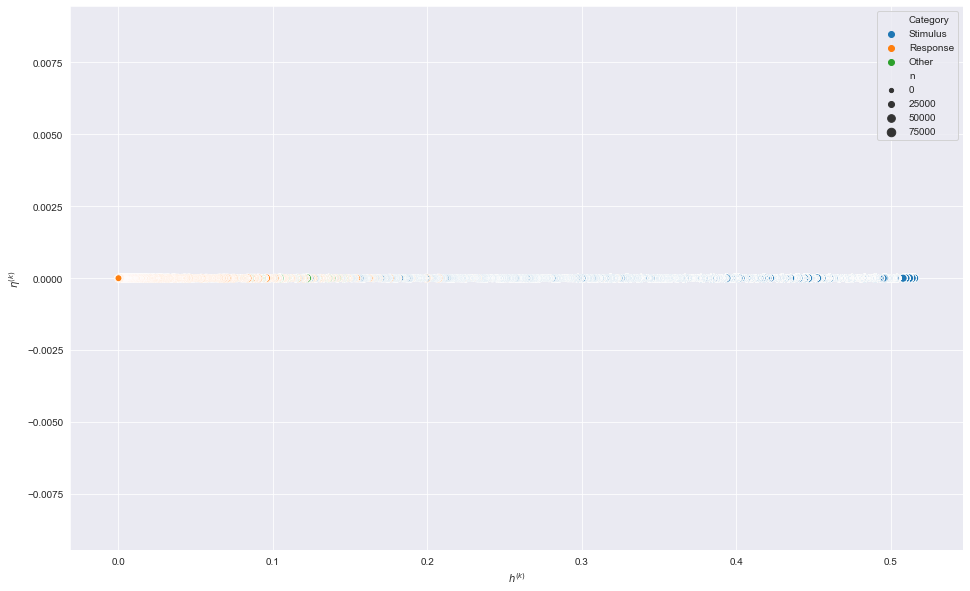

In [54]:
sns.scatterplot(data=dflim[dflim.reliability == 'Reliable'], x=ENT_RATE, y=EXCESS_ENT, hue='Category', size='n')

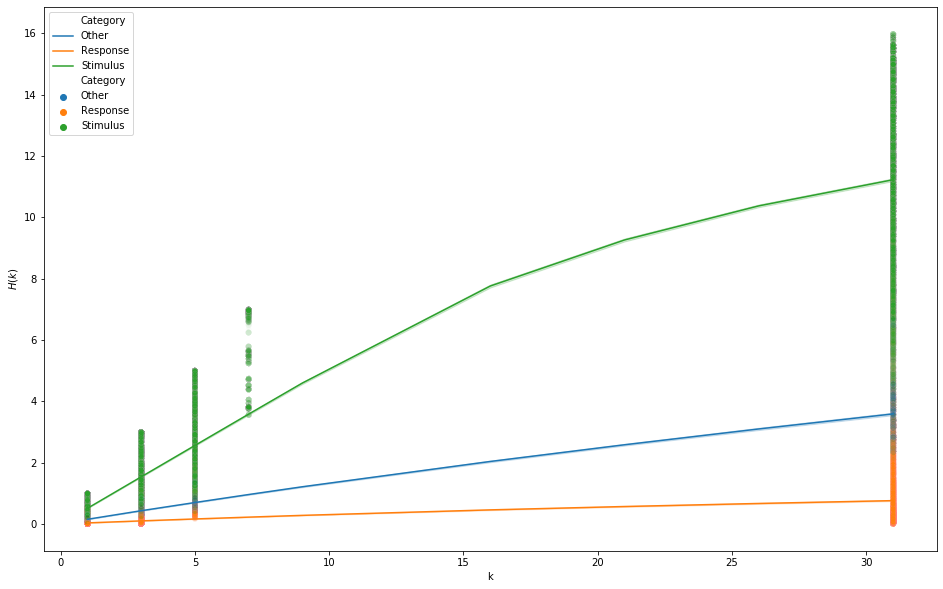

In [42]:
sns.lineplot(data=df, x='k', y=BLOCK_ENT, hue='Category')
sns.scatterplot(data=df[reliable], x='k', y=BLOCK_ENT, hue='Category', alpha=.02)

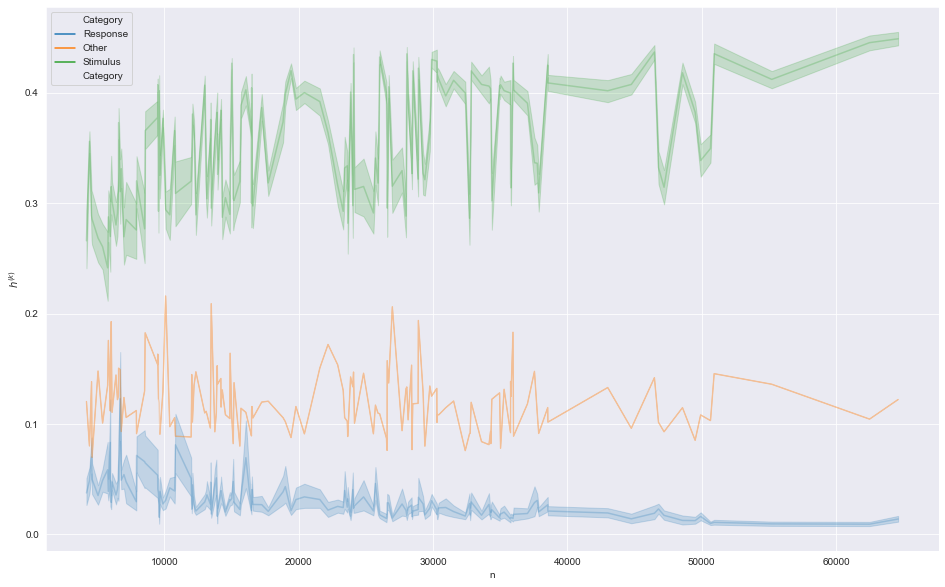

In [49]:
reliable_lim = dflim.reliability == 'Reliable'
sns.set_style("darkgrid")
sns.lineplot(data=dflim[reliable_lim], x='n', y=ENT_RATE, hue='Category', alpha=.25)
sns.lineplot(data=dflim[~reliable_lim], x='n', y=ENT_RATE, hue='Category', alpha=.025)
#sns.lineplot(data=dflim[reliable_lim], x='n', y=ENT_RATE, hue='Category', alpha=.25)

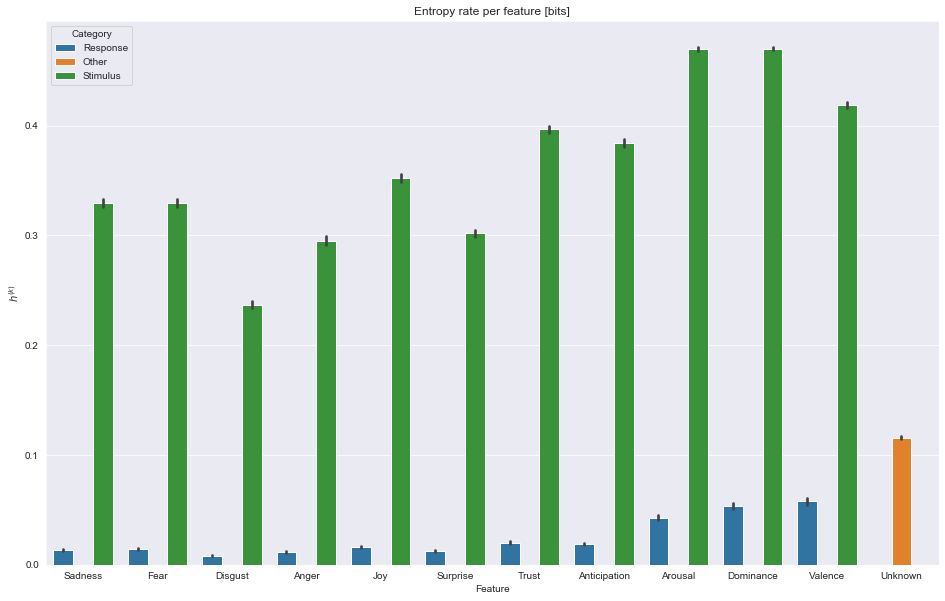

In [44]:
plt.title('Entropy rate per feature [bits]')
sns.barplot(data=dflim, x='Feature', y=ENT_RATE, hue='Category')

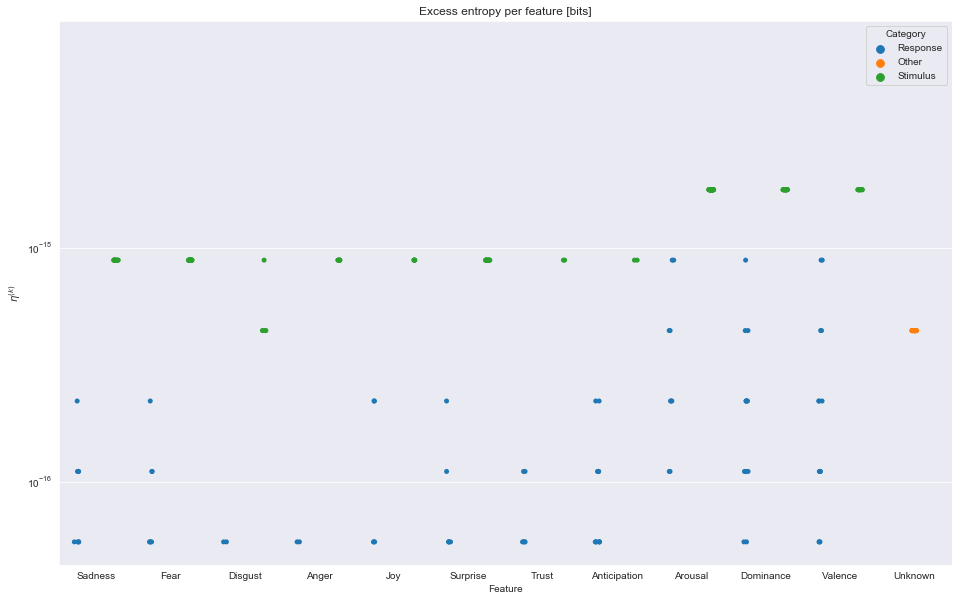

In [45]:
plt.title('Excess entropy per feature [bits]')
plt.yscale('log')
sns.stripplot(data=dflim, x='Feature', y=EXCESS_ENT, hue='Category', dodge=True, jitter=True)

In [223]:
wtfnames = ['Xidx',
'SSubject',
'FOther',
'FUnknown',
'n',
'k',
BLOCK_ENT,
'FResponse',
'FAnger',
'FAnticipation',
'FArousal',
'FDisgust',
'FDominance',
'FFear',
'FJoy',
'FSadness',
'FSurprise',
'FTrust',
'FValence',
'FStimulus',
'SREADER']
tmpdfs = [pd.read_csv(f) for f in DATA_ROOT.glob('**/*.csv')]
tmpdfs = [d[['n','k','be']] for d in tmpdfs if {'n','k','be'}.issubset(set(d.columns))]

In [235]:
tmpdf = pd.concat(tmpdfs, ignore_index=True, sort=True).rename(index=str, columns={'be': BLOCK_ENT})
tmpdf

,$H(k)$,k,n
0,0.207817,1,6603
1,0.932323,5,6599
2,1.761592,10,6594
3,2.516922,15,6589
4,3.230813,20,6584
5,4.542587,30,6574
6,4.374839,40,6564
7,4.096357,50,6554
8,3.753346,60,6544
9,3.591252,70,6534


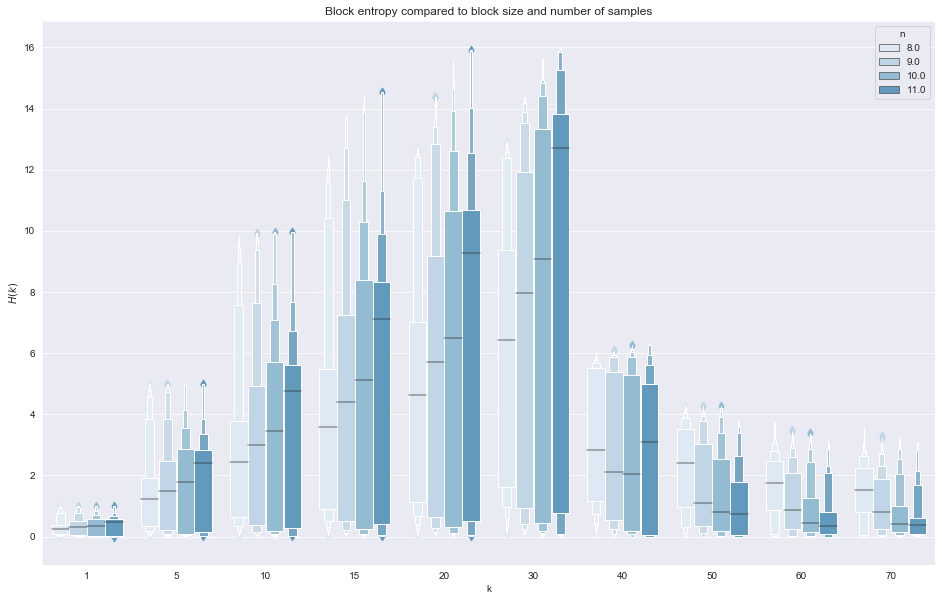

In [237]:
with sns.color_palette("Blues"):
    plt.title('Block entropy compared to block size and number of samples')
    sns.boxenplot(data=tmpdf, x='k', y=BLOCK_ENT, hue=np.floor(np.log(tmpdf.n)))